# Sistemas Inteligentes

## Grado en Ingeniería Informática
## Universidad de Burgos
## José Francisco  Diez
## Curso 2017-2018

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib como plot


# Reconocimiento de formas

En esta práctica se va a hacer un programa muy sencillo de reconocimiento de formas. 

El proceso consistirá en:
- obtener un conjunto de datos X,y
    - X será un conjunto de atributos que describa cada imagen
    - y será la clase
- entrenar una red neuronal con una parte de los datos (conjunto de entrenamiento)
- comprobar su funcionamiento con otra parte (conjunto de test)


Las imágenes con las que se va a trabajar pertenecen al repositorio MPEG7, obtenido de www.dabi.temple.edu/~shape/MPEG7/dataset.html, en la versión de ubuvirtual se han quitado algunas imágenes para simplificar el problema.

Lo primero que se debe hacer es descomprimir las imágenes en la carpeta **MPEG7dataset**.

Cada imagen contiene en su nombre el nombre de la clase a la que pertenece. Se puede obtener el nombre de todos los ficheros de un directorio con **listdir** del modulo **os**


In [2]:
'''
Ejemplo 1
Obtengo los nombres de todos los ficheros y devuelvo para 
para que se muestren los 10 primeros
'''
import os

img_names = os.listdir("MPEG7dataset")
img_names[:10] # solo devuelve los 10 primeros

['apple-1.gif',
 'apple-10.gif',
 'apple-11.gif',
 'apple-12.gif',
 'apple-13.gif',
 'apple-14.gif',
 'apple-15.gif',
 'apple-16.gif',
 'apple-17.gif',
 'apple-18.gif']

In [3]:
'''
Ejemplo 2
obtengo la clase a la que pertenece una imagen
'''
img_names[0].split("-")

['apple', '1.gif']

## Skimage

La librería Skimage o Scikit-Image es una librería de Python construida sobre Numpy que tiene algoritmos de tratamiento de imágenes: operaciones con color, transformaciones, filtros, segmentación etc

Se puede cargar una imagen simplemente con el método **imread** y se puede mostrar con el método **imshow**, ambos métodos del módulo **skimage.io**

In [4]:
'''
Ejemplo 3
Obtiene img a partir de su ruta en el disco.
'''
from skimage.io import imshow, imread
# os.sep es el separador del sistema operativo (/ (linux) o \ (windows))
img = imread("MPEG7dataset"+os.sep+img_names[0])

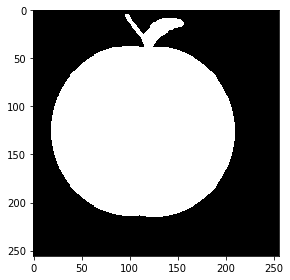

In [5]:
# muestra la imagen
imshow(img)

In [6]:
'''
En skimage las imágenes son arrays de numpy, un tipo de objeto
similar a las listas, pero más eficiente y con muchas operaciones
especiales.
'''
print(img.shape)
img

(256, 256)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
img.size # alto x ancho

65536

In [8]:
'''
Ejemplo 4
Se cambia la forma, pasa de tener alto filas y ancho columnas a tener alto x ancho valores
en una sola dimensión
'''
# se pasa a una sola fila y se convierte en lista
lista_pixels = img.reshape(img.size).tolist()

In [9]:
'''
Ejemplos de operaciones de arrays de numpy que no existen para listas
'''
import numpy as np

array1 = np.array([1,2,3,4,5])
array2 = np.array([10,20,30,40,50])

print(array1+array2) 
print(array1*2)
print(array1.mean())
print(array1.sum())

[11 22 33 44 55]
[ 2  4  6  8 10]
3.0
15


### Redimensionar una imágen

Se puede redimensionar una imagen usando el método **resize** del módulo **skimage.transform**.

En el ejemplo de abajo se redimensiona y se muestra.

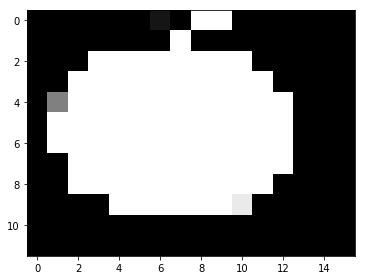

In [10]:
'''
Ejemplo 5
Redimensiona una imagen a 12 x 16
'''

from skimage.transform import resize
import warnings

'''
el metodo resize lanza un warning, así simplemente se impide 
que se muestre por pantalla
''' 
warnings.filterwarnings("ignore")

img_mini =  resize(img, (12, 16))
imshow(img_mini)

## Creación del conjunto de datos

Se va a proceder a la construcción del conjunto de datos. El conjunto de datos estará formado por X e y. 

- X será un array 2D con tantas filas como imágenes y tantas columnas como atributos se usen para describir cada imagen.
- y será un array de una sola dimensión, con tantos elementos como imágenes, sus valores serán los nombres de las clases de cada imagen.

Se puede construir X de muchas maneras:
- X: los atributos son simplemente los valores de los pixels, después de reducir la dimensión para que no haya miles de atributos



In [11]:
'''
Ejemplo 6

Recorre todos los ficheros y construye el conjunto de datos X,y
'''
import warnings
warnings.filterwarnings("ignore")


lista_X = []
lista_y = []
for name in img_names:
    # completa este ejemplo
    lista_y.append(name.split("-")[0])
    
    
X = np.array(lista_X)
y = np.array(lista_y)
X.shape,y.shape 
    

((0,), (1399,))

# Tarea

## **Tarea a completar por el alumno:**
- Hacer una función *get_dataset()* que devuelve X e y. Dicha función se basará en el ejemplo 6 y hará uso de los códigos vistos en los ejemplos 1-5.

In [26]:
import warnings
def get_dataset():
    
    warnings.filterwarnings("ignore")

    lista_X = []
    lista_y = []
    for name in img_names:
        # completa este ejemplo
        img=imread("MPEG7dataset"+os.sep+name)
        img2d=resize(img,(16,16))
        listapix=img2d.reshape(img2d.size).tolist()
        lista_X.append(listapix)
        lista_y.append(name.split("-")[0])

    X = np.array(lista_X)
    y = np.array(lista_y)
    return X,y

X,y=get_dataset()
print(X)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [27]:
print(X.shape)

(1399, 256)


-----------

-----------

-----------

-----------

## Construcción y evaluación del clasificador de formas.

En python tenemos una librería de minería de datos llamada **Scikit-learn** o **Sklearn**. También viene incluida en Anaconda. Esta librería permite entrenar muchos tips de clasificadores, entre ellos la **red neuronal** vista en teoría.

Como solo tenemos un conjunto de imágenes solo tenemos un conjunto de datos. Si queremos comprobar de manera justa el comportamiento del clasificador tenemos que descomponer el conjunto de datos en entrenamiento y test.

El 70% será para entrenamiento y el 30% para test.

El método **train_test_split** del módulo **sklearn.model_selection** permite dividir un conjunto de datos en dos partes, una para entrenar el clasificador y otra para evaluar su funcionamiento.

Uso estratificación: la misma proporción de clases en entrenamiento que en test.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = 0.7 )


En **Sklearn** todos los clasificadores tienen el mismo funcionamiento. 
Se crea, si no indicamos ningún argumento se crea el clasificador con todos los parámetros por defecto. Y luego:
- el método **fit** entrena el clasificador
- el método **predict** recibe uno o varios ejemplos y nos devuelve las clases que estima el clasificador.

In [29]:
# puede tardar unos minutos
from sklearn.neural_network import MLPClassifier


classifier = MLPClassifier()

classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [30]:
'''
y_pred son las clases que estima el clasificador, si las comparasemos
con las clases reales y_test podríamos saber cuanto acierta el clasificador.
'''
y_pred = classifier.predict(X_test)

# Tarea

## **Tarea a completar por el alumno:**

**Sklearn** tiene métodos para evaluar un clasificador en términos de porcentaje de acierto y otras medidas, pero no las vamos a usar.

Se pide una función que compare *y_pred* con *y_test* y devuelva el porcentaje de acierto.

In [42]:
def compare(y_pred,y_test):
    lista_acierto=(y_pred==y_test)
    contador=0
    total=0
    
    for elemento in lista_acierto:
        total=total+1
        if (elemento==True):
            contador=contador+1
    
    return (contador/total)*100    

In [43]:
holiwi=compare(y_pred,y_test)
print(holiwi)

80.23809523809524
